# Risk factor model

## libraries

In [2]:
import pandas_datareader # package for financial Datasets
import matplotlib.pyplot as plt # importing matplotlib for graphs


In [4]:
pandas_datareader.famafrench.get_available_datasets() # get data from online research library - return of commun risk factors

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [10]:
# when to start dataset
start='1926-01-01' # chosing firts possible date

ff= pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read() #monthly data to decrease noise

In [11]:
# display data to see what we got 
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-06   -8.43  2.09 -5.97  0.06
 2022-07    9.57  2.81 -4.10  0.08
 2022-08   -3.77  1.39  0.31  0.19
 2022-09   -9.35 -0.82  0.03  0.19
 2022-10    7.83  0.10  8.06  0.23
 
 [1156 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2017   21.51  -4.97 -13.51  0.80
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 
 [95 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [13]:
# Separating the dataframe for analysis

ff_df=ff[0]
ff_df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31


### explanation for the colunms 
- Mkt-RF = market - risk free rate
- SMB = small minus big
- HML = high minus low
- RF = risk free rate

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

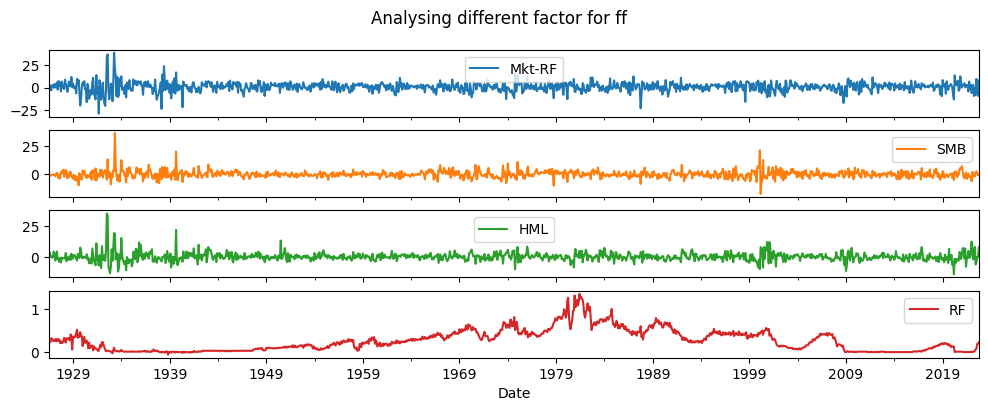

In [16]:
ff_df.plot(subplots=True, figsize=(12,4), title="Analysing different factor for ff") # plotting all df colunms 


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

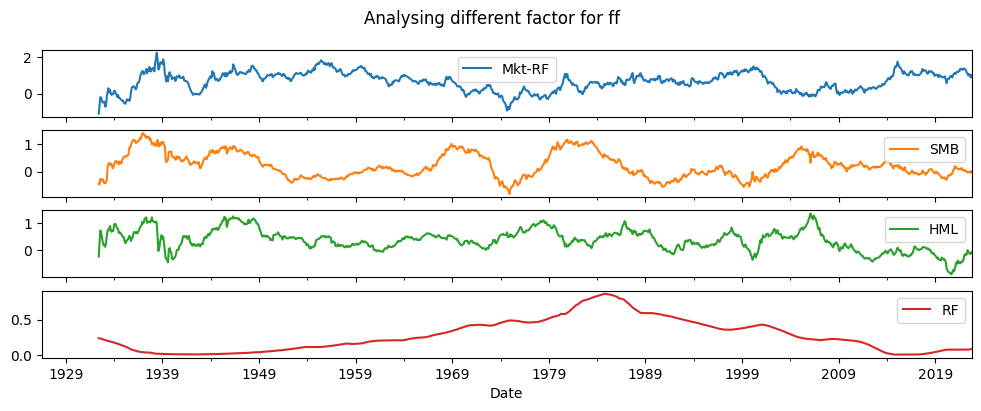

In [17]:
# It is possible to do the mean of a 72 month window
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4), title="Analysing different factor for ff in a 72 month window")


NameError: name 'matplotlib' is not defined